# Breast Tumor Diagnosis Using Machine Learning

In [1]:
#import a few libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import breast cancer dataset and examine the first couple of rows
df = pd.read_csv('data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Set Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign) 


Ten real-valued features are computed for each cell nucleus: 

- **`radius`** (mean of distances from center to points on the perimeter)
- **`texture`** (standard deviation of gray-scale values)
- **`perimeter`**
- **`area`**
- **`smoothness`** (local variation in radius lengths)
- **`compactness`** (perimeter^2 / area - 1.0)
- **`concavity`** (severity of concave portions of the contour)
- **`concave points`** (number of concave portions of the contour)
- **`symmetry`**
- **`fractal dimension`** ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.


## Data Wrangling

In [3]:
# Looking a little closer at the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Very clean dataset, no NaN's or missing values except in the **`Unnamed: 32`** col which we will remove from the DataFrame

Additionally, for the purposes of this project, the **`id`** attribute will also be removed

In [4]:
# Removing 'id' & 'Unnamed: 32' column
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

### This is a very clean dataset. not really anymore data wrangling steps to perform.

What remains are 31 columns, 30 features and 1 dependant variable, and 569 rows

## Data Exploration and Visualization

In [5]:
# Take a look at the distribution of the response variable 'diagnosis'

df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**This indicates if the tumor was B = benign, or M = malignant**

This is a good application later on for **`Logistic Regression`**,  will recode to 0 and 1 prior to applying Machine Learning.

In [6]:
# Lets look at a list of column names
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Creating Column Groupings

When dealing with a large number of data features, 30 in this instance, it is sometimes easier to work with smaller logical blocks. Below, I have broken down the features into four groups:
1. All Data Columns
2. Mean Data Columns
3. Standartd Error Data Columns
4. Worst, or Largest Data Columns

In [7]:
# create a list of data columns
all_data_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
mean_data_cols = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 
                  'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 
                  'fractal_dimension_mean']
se_data_cols = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 
                'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se']
worst_data_cols = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                   'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 
                   'fractal_dimension_worst']

In [8]:
# adding 'diagnosis' to the list of cols so I can use it in the pairplot to show separation in
# the distribution of measurements that are benign and malignant
mean_data_cols_d = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 
                  'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 
                  'fractal_dimension_mean', 'diagnosis']
se_data_cols_d = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 
                'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'diagnosis']
worst_data_cols_d = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                   'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 
                   'fractal_dimension_worst', 'diagnosis']

To get a quick overview of some basic statistical information I will use the Pandas describe() method on each of the data groupings

In [9]:
df[mean_data_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [10]:
df[se_data_cols].describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [11]:
df[worst_data_cols].describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The major take away here is that the scale of some features are magnitudes of order larger than others.

For example the mean of the **`'area_mean'`** feature is 654.889104	 while the mean of the **`'concave points_mean'`** feature is 0.048919.

Because of this we will need to Standardize the data for some visualizations to make sense, in addition to Machine Learning a little later

## Visualization

We have 30 continuous numeric features where we are trying to distinguish the differences between **`"B"`** Benign and **`"M"`** Malignant tumors. I find the most efficient way to examine the distributions of this type of data is to use histograms, scatterplots and box plots.

The first visualization will be a Seaborn pairplot. It provides much the same information as a Pandas scatter matrix, a histogram to show the general distribution and scatter plots of each feature.

Additionally, the Seaborn pairplot allows us to color the scatterplot points by the diagnosis feature, **`"B"`** or **`"M"`**. And overlay the histograms by **`"B"`** and **`"M"`**.

In [12]:
import seaborn as sns

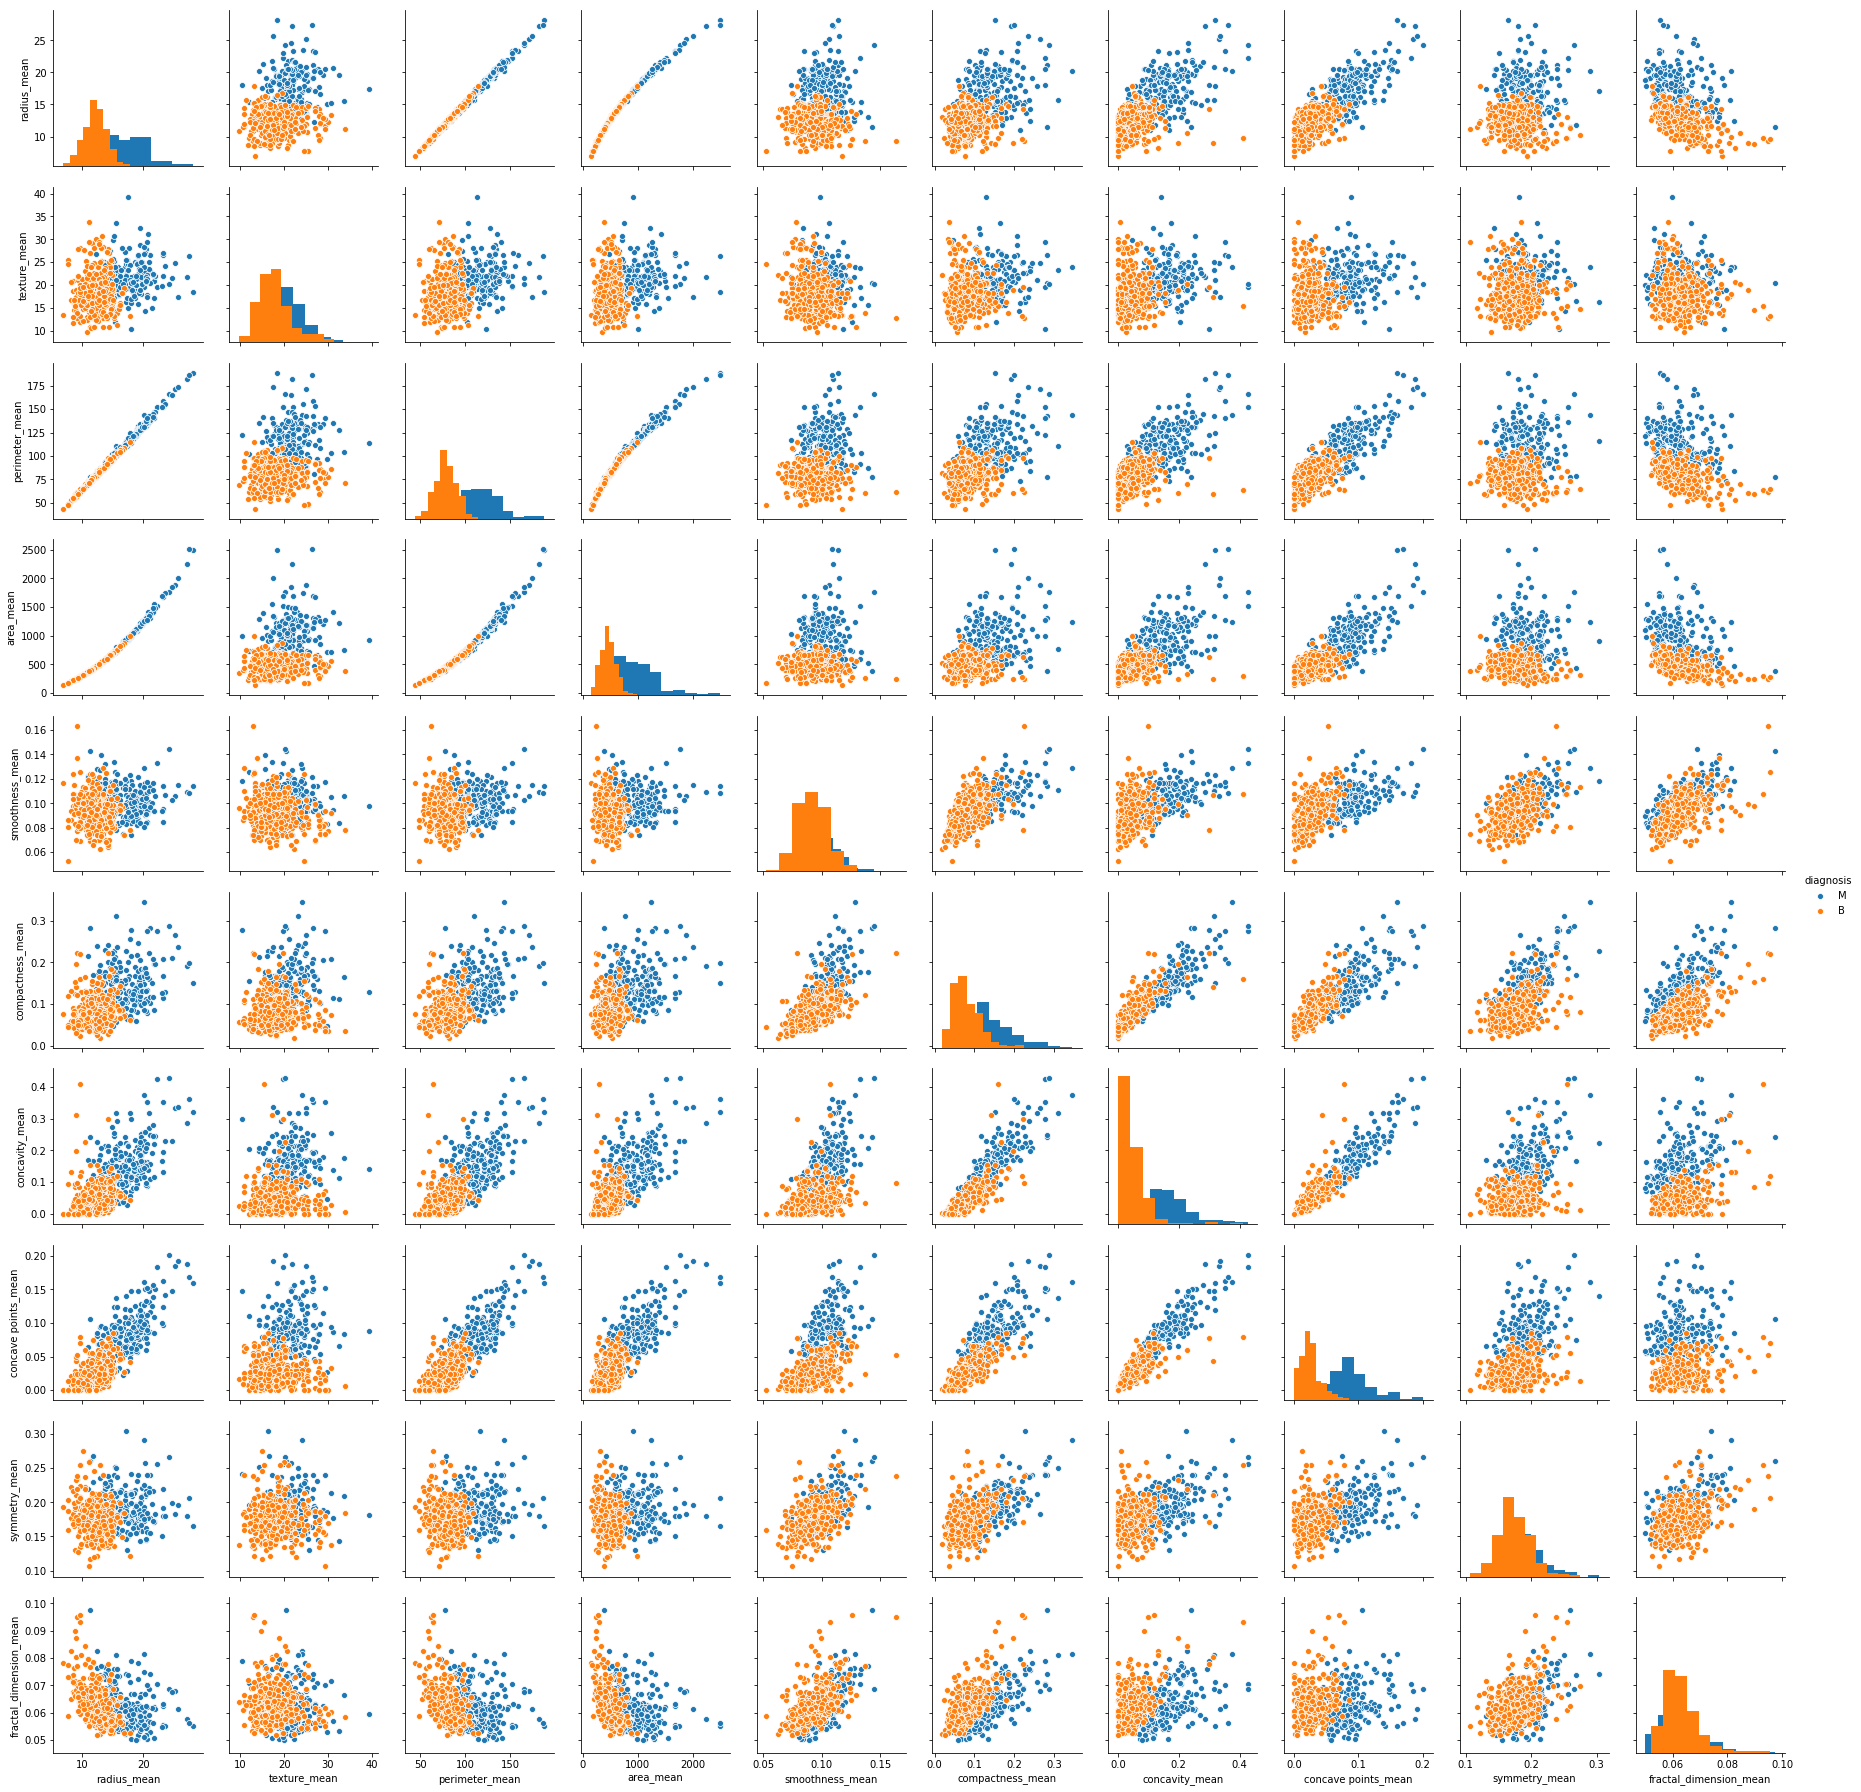

In [13]:
#First the mean_data_cols
sns.pairplot(df[mean_data_cols_d], hue='diagnosis', diag_kind="hist")  

Here we can see several features showing to be highly collinear. Radius, perimeter and area are obvious but others look highly correlated as well.

In the individual feature histograms you can start to see which variables would make better predictor features. The more divergence between the Benign and Malignant distributions the better.

To confirm correlation I will look at the Pearson's correlation coefficients for the feature pairs

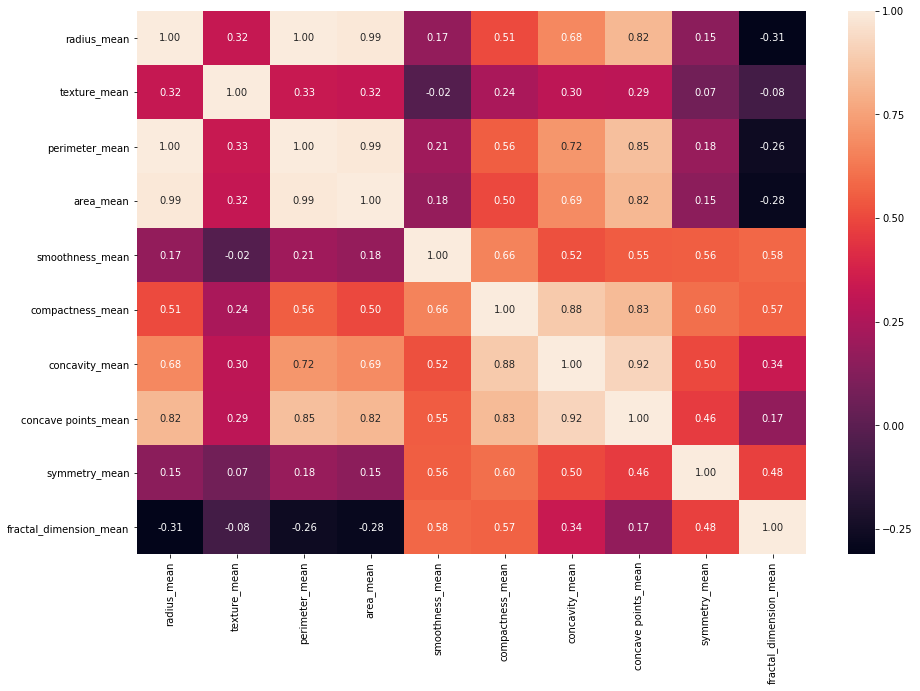

In [14]:
# Correlation matrix as a heatmap of the mean_data_cols
plt.figure(figsize=(15, 10))
sns.heatmap(df[mean_data_cols].corr(), annot=True, fmt=".2f")

As suspected **`radius_mean`**, **`perimeter_mean`**, and **`area_mean`** are almost perfectly correlated! Additionally, there are many other pairs of features that are also highly correlated. **`concave points_mean`** has correlation coefficients > 0.8 with five other features.

The issue of feature correlation will be addressed during feature selection. In this section we are just interested in the insights we can gain from visual representations of the data.

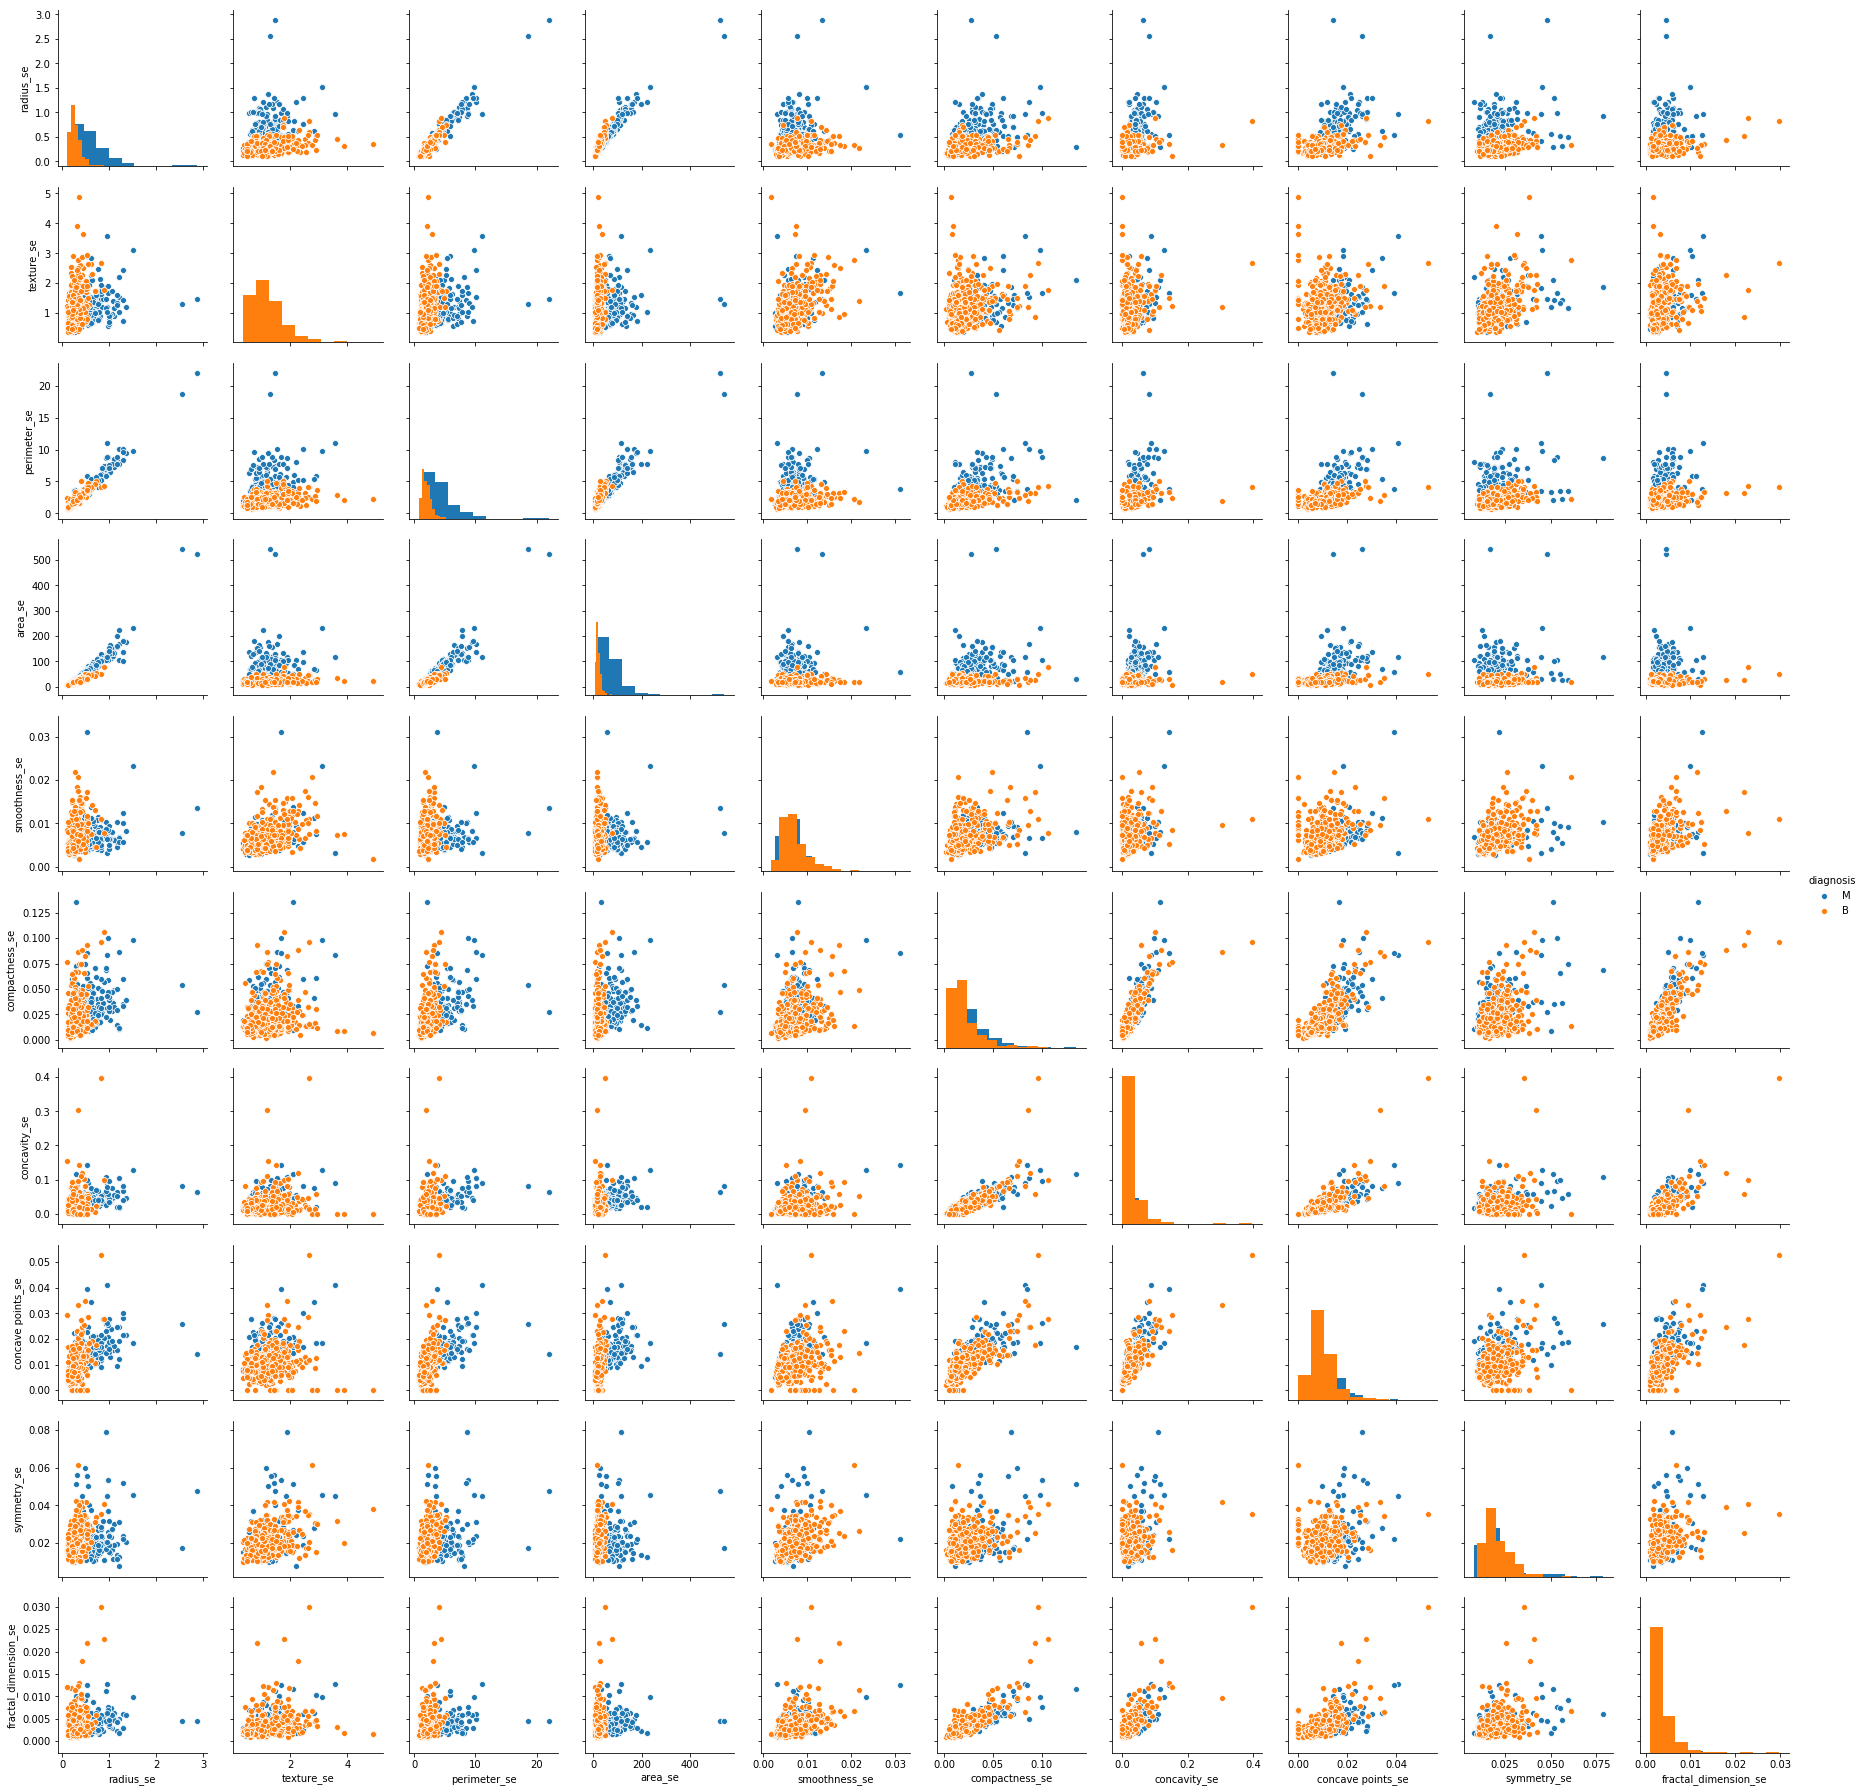

In [15]:
#Second, the standard error features
sns.pairplot(df[se_data_cols_d], hue='diagnosis', diag_kind="hist")

The standard error histograms show the Benign and Malignant distributions essentially sitting on top of each other. Which means these features will probably not be the strongest in differentiating between benign and malignant tumors.

Again we see collinearity, but not to the degree seen Mean features.

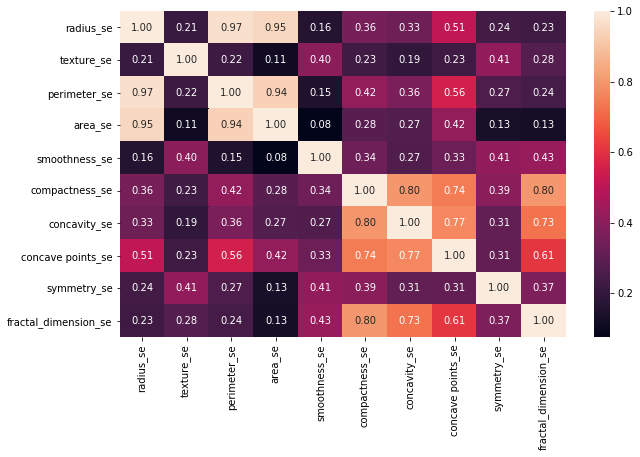

In [16]:
# Correlation matrix as a heatmap of the se_data_cols
plt.figure(figsize=(10, 6))
sns.heatmap(df[se_data_cols].corr(), annot=True, fmt=".2f")

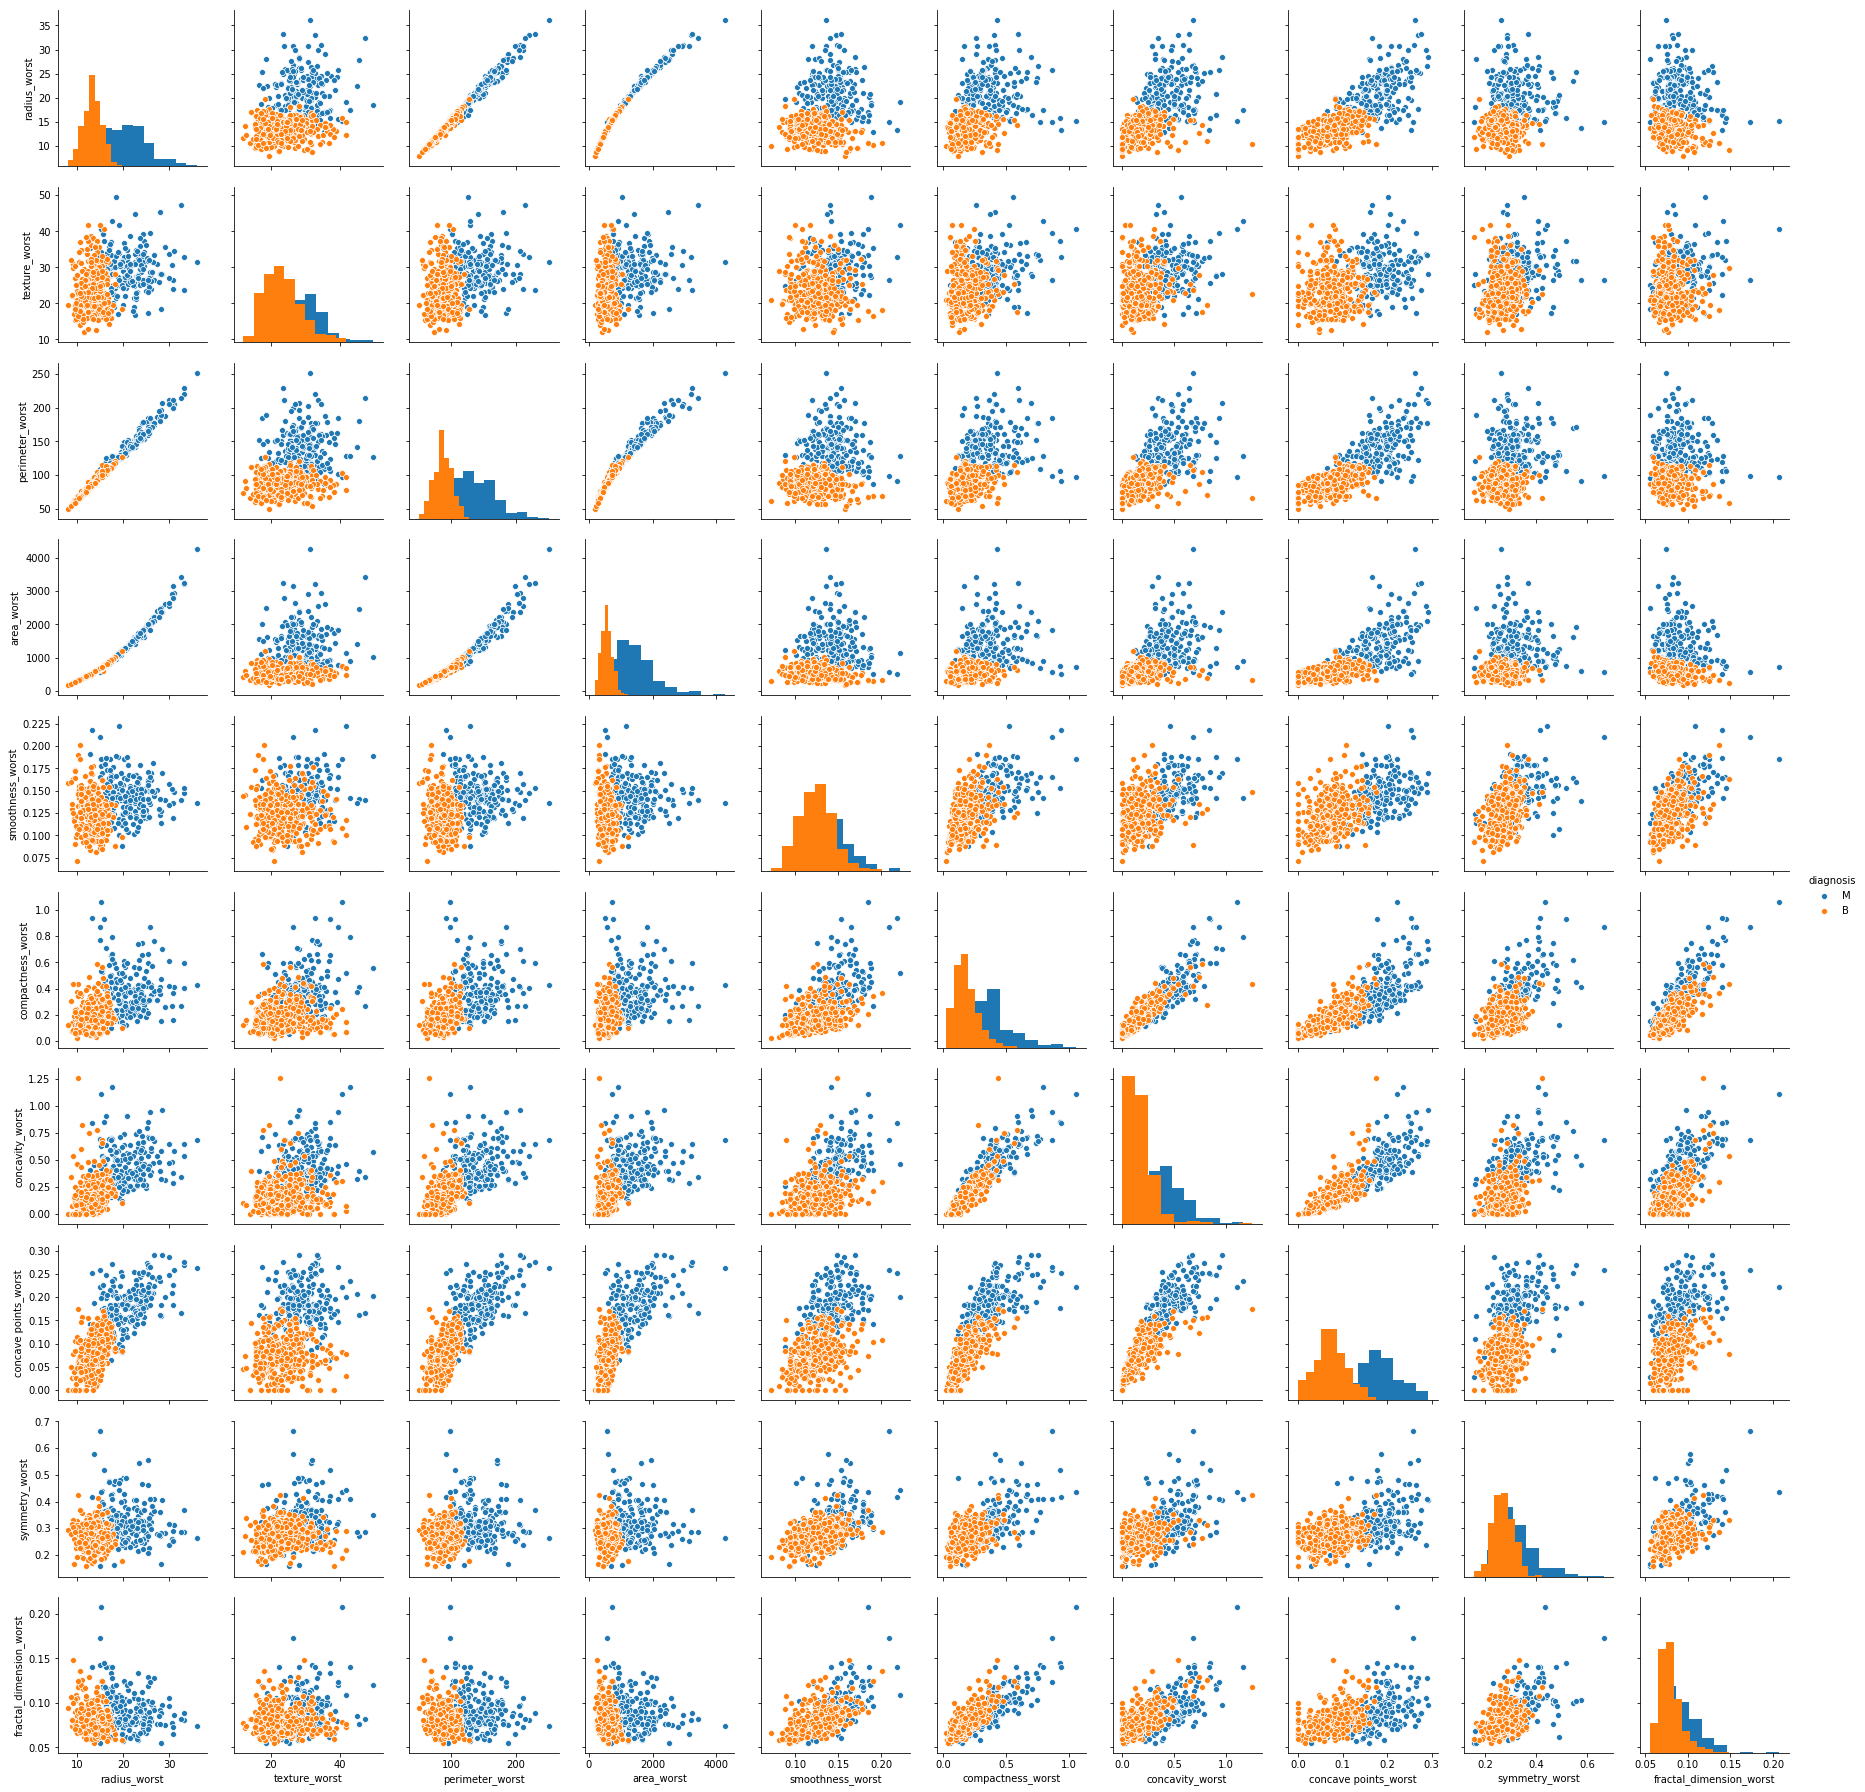

In [17]:
#Finally, the worst, or largest features
sns.pairplot(df[worst_data_cols_d], hue='diagnosis', diag_kind="hist")

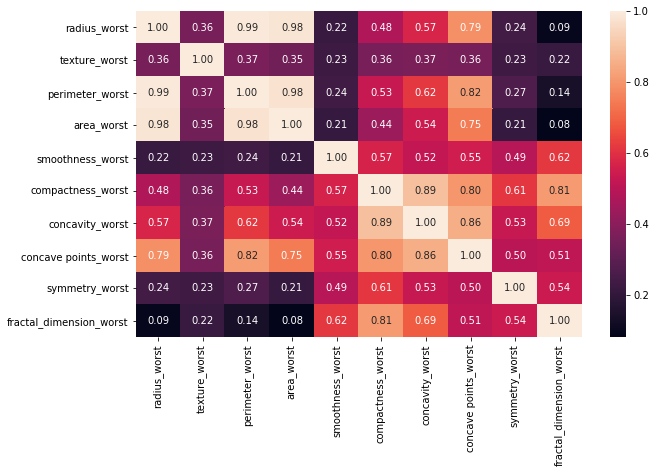

In [18]:
# Correlation matrix as a heatmap of the worst_data_cols
plt.figure(figsize=(10, 6))
sns.heatmap(df[worst_data_cols].corr(), annot=True, fmt=".2f")

## Box Plots

While histograms are nice and give you a general idea of the normality and distribution of your data, to see if there is a real difference in two populations of data I prefer to see box plots.

As was mentioned earlier, because of differences in the measurement scales of the different features, we will have to normalize the grouped features in order to make direct comparisons.

In [19]:
# Create a Series for the response variable
y = df.diagnosis

# Create DataFrames for the Mean, Standard Error, and Worst features
x_all = df[all_data_cols]
x_mean = df[mean_data_cols]
x_se = df[se_data_cols]
x_worst = df[worst_data_cols]

In [20]:
# _mean data features
data_dia = y
data = x_mean

# normalize the data
data_mean_norm = (data - data.mean()) / (data.std()) 

# match the diagnosis with the standardized data
data = pd.concat([y, data_mean_norm], axis=1) 



In [21]:
# melt the DataFrame, essentially un-pivoting it so there is only one value column and one features column
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


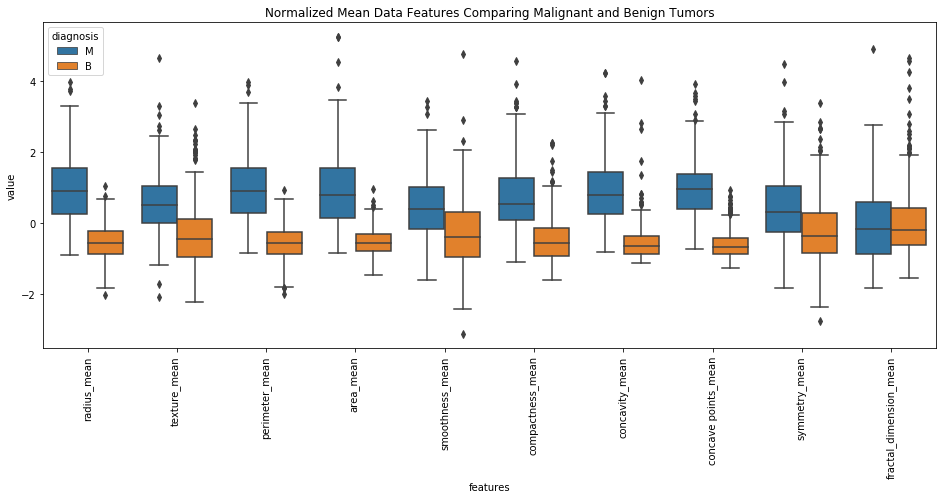

In [22]:
# Creating the boxplots
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Normalized Mean Data Features Comparing Malignant and Benign Tumors")
plt.show()

Here we can see some of the same patterns as noted before. Notice how the box plots for **`radius_mean`**, **`perimeter_mean`**, and **`area_mean`** are very close to the same. As well as **`concavity_mean`** and **`concave points_mean`**

We can also see that **`smoothness_mean`**, **`symmetry_mean`**, and **`fractal_Dimension_mean`** will not make good predictor features because their IQR's (Inner Quartile Range) boxes overlap. Meaning their p-value is much higher than 0.05.

Outliers are noted

In [23]:
# Standard Error data features
data_dia = y
data = x_se

# normalize the data
data_se_norm = (data - data.mean()) / (data.std()) 

# match the diagnosis with the standardized data
data = pd.concat([y, data_se_norm], axis=1) 

# melt the DataFrame, essentially un-pivoting it so there is only one value column and one features column
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

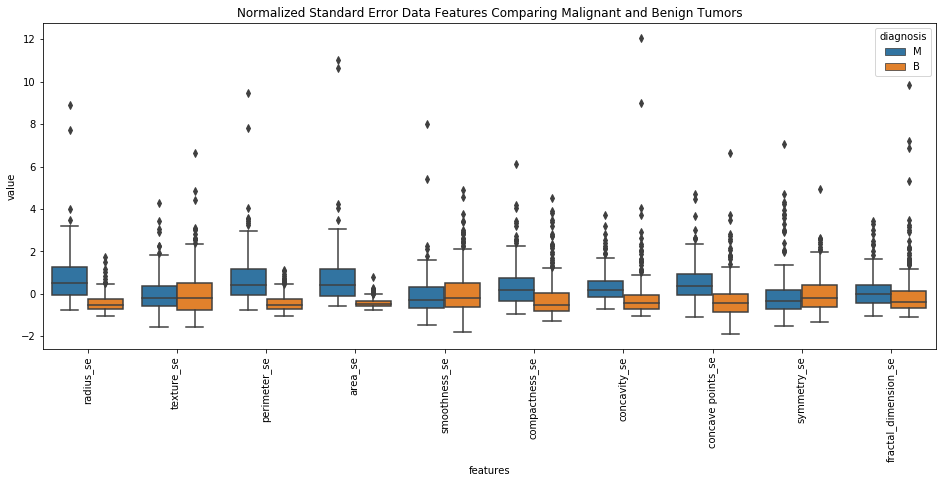

In [24]:
# Creating the boxplots
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Normalized Standard Error Data Features Comparing Malignant and Benign Tumors")
plt.show()

Because of the IQR overlap it doesn't look like any of these features will be good candidates for inclusion in the final model

In [25]:
# Standard Error data features
data_dia = y
data = x_worst

# normalize the data
data_worst_norm = (data - data.mean()) / (data.std()) 

# match the diagnosis with the standardized data
data = pd.concat([y, data_worst_norm], axis=1) 

# melt the DataFrame, essentially un-pivoting it so there is only one value column and one features column
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

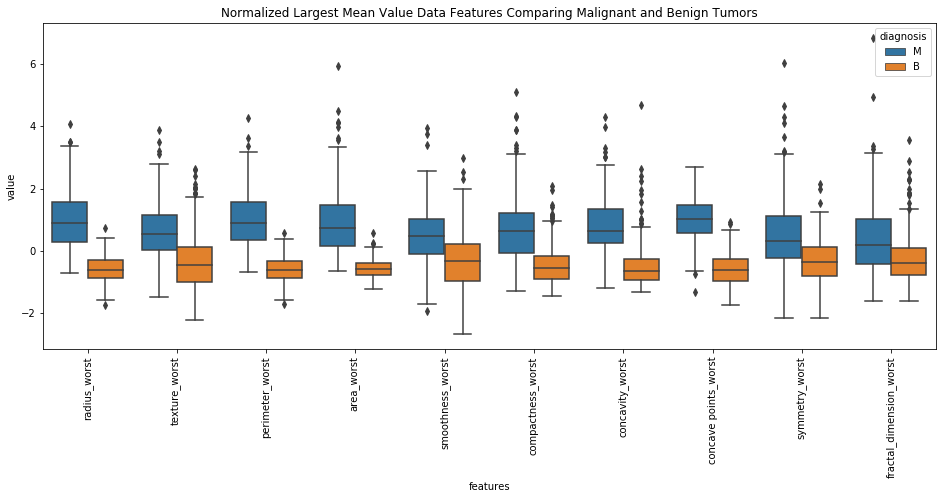

In [26]:
# Creating the boxplots
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Normalized Largest Mean Value Data Features Comparing Malignant and Benign Tumors")
plt.show()

### EDA Summary

Above we can see that there are 30 features, and several features multicollinearity. Rather than go through the laborious process of stepwise feature reduction to come up with the best model, I will standardize all of the data features, then determine the best regularization parameter to apply to the model.

By standardizing all of the data features we rescale the features to have a mean of zero and a standard deviation of 1. This will address the impact of multicollinearity and the large number of features.

Regularization will address any overfitting when training machine learning algorithms and yield a better prediction function

## Applying Machine Learning

Analyzing the data we can see that a Supervised Machine Learning model is appropriate because all of the features are labelled. Additionally we see that the the dependant variable, 'diagnosis' is binary, B (benign) or M (malignant). This makes it a Classification problem.

For this project I will start with a basic k-NN Classifier to get a baseline feel for the accuracy we can expect from the model. I will then model the data using Logistic Regression, Random Forests, and Gradient Boosting in order to determine the best model.

In ranking or grading the models I will use two measures: Recall and AUC_ROC.

- **Recall** - Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives. Put another way it is the number of positive predictions divided by the number of positive class values in the test data. It is also called Sensitivity or the True Positive Rate. 
- **AUC-ROC** - AUC is the area under the curve of Receiver Operator Characteristic (ROC) plot False Positive Rate vs True Positive Rate at different points. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

The AUC-ROC will be used to get a general sense of the accuracy of a model. But the factor that will ultimately determine the best model is Recall of the Malignant responses. In this project we are dealing with human beings where the outcome of our model is Benign/Malignant, or Life/Death. For this reason the 'accuracy' of our prediction is not sufficient. 

Recall was chosen as the primary scoring method because it considers False Negatives. A False Negative in our model would mean that we diagnosed a woman's tumor as being benign when in fact it was malignant. We strive for a Recall as close to 100% as possible with our model.

First, import the libraries we will use:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [28]:
# recheck the DataFrame data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

The diagnosis field is still dtype: object

Recode to 0 and 1 for Logistic Regression analysis

In [29]:
# remap diagnosis col to 0 and 1
df.diagnosis = df.diagnosis.map({'M':1,'B':0})

# check diagnosis col datatype
df.diagnosis.dtype

dtype('int64')

## k-NN Classifier
First we will start off with a very basic k-NN classifier with all of the features and check its Recall and AUC Scores.

In [30]:
# all data features
data = x_all

# Standardize the data
X_s = (data - data.mean()) / (data.std()) 

X_s.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [31]:
# Create feature and target arrays
X = df[all_data_cols]
y = df.diagnosis

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.4, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9605263157894737


Not bad for a first attempt! But we can do better. Let's compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k.

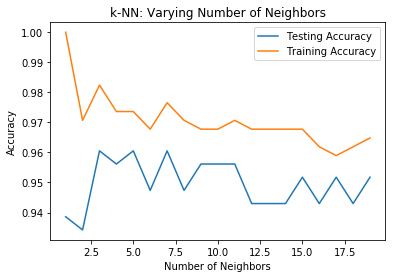

In [32]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [33]:
# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9605263157894737


## Confusion Matrix and Classification Report

In [34]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143   0]
 [  9  76]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       143
          1       1.00      0.89      0.94        85

avg / total       0.96      0.96      0.96       228



**`Precision`** can be seen as a measure of exactness, or quality. also called the **`positive predictive value`**

- Precision = tp / (tp + fp) for Benign = 143/(143+9), for Malignant = 76/(76+0)

**`Recall`** is a measure of completeness or quantity

- Recall = tp / (tp + fn) for Benign = 143/(143+0), for Malignant = 76/(76+9)

**`F1 score`** combines precision and recall

- F1 score = 2 x (precision x recall) / (precision + recall)

The precision values are reasonable. However, the `Recall` or Sensitivity for `Malignant` tumors is too low. Sensitivity measures the proportion of actual positives that are correctly identified. Here, for `Malignant` tumors, 89% were correctly identified as being malignant but 11% that were also `Malignant` were misclassified as being `Benign`.

## Plot the ROC for k-NN

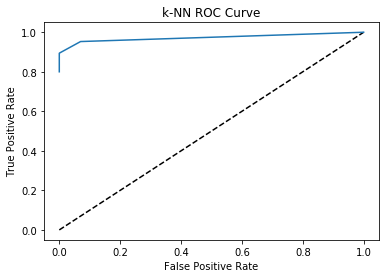

In [35]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN ROC Curve')
plt.show()

## Compute the AUC

In [36]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Import necessary modules
from sklearn.metrics import roc_auc_score

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn, X, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9727684080625257
3-fold cross validation AUC scores:  [0.91608474 0.96685998 0.94957983]


## k-NN Summary:
- **Malignant Recall** = 0.8941
- **AUC** = 0.9728

## Logistic Regression:

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [37]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', logreg.score(X_train, y_train))
print('Accuracy on the test data = ', logreg.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  0.9853372434017595
Accuracy on the test data =  0.9824561403508771
[[145   3]
 [  1  79]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       148
          1       0.96      0.99      0.98        80

avg / total       0.98      0.98      0.98       228



Much better Malignant Recall, only one false negative for malignant tumors!

## Plot the ROC for Logistic Regression

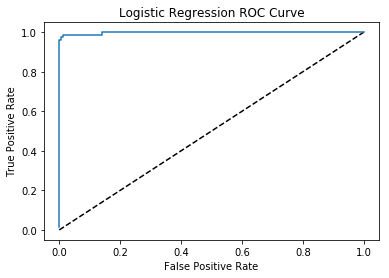

In [38]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

Much better ROC curve for Logistic Regression

## Compute the AUC score for Logistic Regression

In [39]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_s, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9979729729729729
3-fold cross validation AUC scores:  [0.99431885 0.99763286 0.99063625]


## Logistic Regression Summary (Pre-Hypertuning of Parameters)
- **Malignant Recall** = 0.9875
- **AUC** = 0.9980

## Logistic Regression Hyperparameter tuning 
Like the alpha parameter of lasso and ridge regularization, logistic regression also has a regularization parameter: *`C`*. *`C`* controls the inverse of the regularization strength. A large *`C`* can lead to an overfit model, while a small *`C`* can lead to an underfit model.

In addition to *C*, logistic regression has a **`'penalty'`** hyperparameter which specifies whether to use **`'l1'`** or **`'l2'`** regularization.

Regularization is a technique to avoid overfitting when training machine learning algorithms. If you have an algorithm with enough free parameters you can interpolate with great detail your sample, but examples coming outside the sample might not follow this detail interpolation as it just captured noise or random irregularities in the sample instead of the true trend. 

Overfitting is avoided by limiting the absolute value of the parameters in the model. This can be done by adding a term to the cost function that imposes a penalty based on the magnitude of the model parameters. 

If the magnitude is measured in L1 norm this is called "L1 regularization" (and usually results in sparse models), if it is measured in L2 norm this is called "L2 regularization", and so on.



In [40]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv=5 )

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9736070381231672


Running the model again with the hypertuned parameters

In [41]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg with new C value, penalty=l2 is default
logreg = LogisticRegression(C=0.4393970560760795)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', logreg.score(X_train, y_train))
print('Accuracy on the test data = ', logreg.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  0.9853372434017595
Accuracy on the test data =  0.9912280701754386
[[147   1]
 [  1  79]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       148
          1       0.99      0.99      0.99        80

avg / total       0.99      0.99      0.99       228



Slight improvement in benign recall!

In [42]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_s, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9985641891891892
3-fold cross validation AUC scores:  [0.99597586 0.99869807 0.99039616]


## Logistic Regression Summary (Hypertuned Parameters)
- **Malignant Recall** = 0.9875
- **AUC** = 0.9986

slight increase in performance after hypertuning

## Rank the importance of the Logistic Regression Coefficients

texture_worst           0.943562
symmetry_worst          0.855121
radius_se               0.809812
concave points_mean     0.783062
concavity_worst         0.712591
concave points_worst    0.651508
concavity_mean          0.641614
area_se                 0.616604
radius_worst            0.602004
area_worst              0.574298
dtype: float64


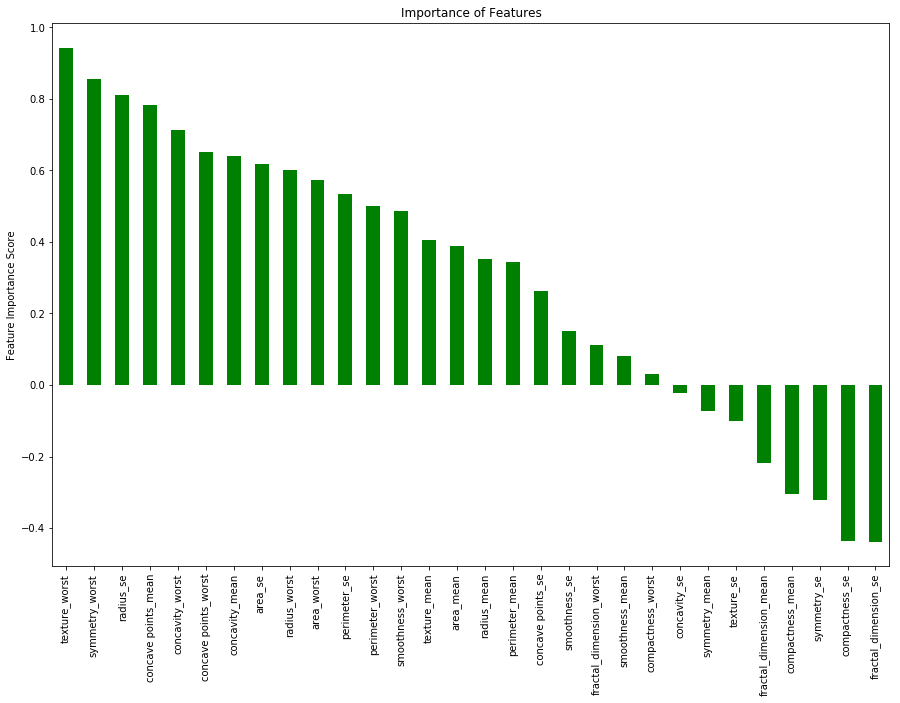

In [43]:
# print the top 10 logistic regression coeffieients
featimp = pd.Series(logreg.coef_[0], index=X_s.columns).sort_values(ascending=False)
print(featimp[0:10]) 

# Create a chart
plt.figure(figsize=(15,10))
featimp.plot(kind='bar', title='Importance of Features', color='green') 
plt.ylabel('Feature Importance Score')
plt.show()

In [44]:
# Another method to do the same thing
sorted(zip(logreg.coef_[0], X_s.columns), reverse=True)

[(0.9435617478363431, 'texture_worst'),
 (0.8551210476447099, 'symmetry_worst'),
 (0.8098122412321914, 'radius_se'),
 (0.7830624310240509, 'concave points_mean'),
 (0.7125905858222235, 'concavity_worst'),
 (0.6515083359923908, 'concave points_worst'),
 (0.641614322858903, 'concavity_mean'),
 (0.6166036405953605, 'area_se'),
 (0.6020041966912351, 'radius_worst'),
 (0.5742977206159545, 'area_worst'),
 (0.5352469697308792, 'perimeter_se'),
 (0.4999110031905826, 'perimeter_worst'),
 (0.4874243628004857, 'smoothness_worst'),
 (0.40605439021782563, 'texture_mean'),
 (0.38846621383958896, 'area_mean'),
 (0.3530826297906694, 'radius_mean'),
 (0.34418536579912323, 'perimeter_mean'),
 (0.2640173008788356, 'concave points_se'),
 (0.15079707063969797, 'smoothness_se'),
 (0.1112504127440175, 'fractal_dimension_worst'),
 (0.08078704186027051, 'smoothness_mean'),
 (0.030873480426460567, 'compactness_worst'),
 (-0.022467042165056343, 'concavity_se'),
 (-0.07357223178719775, 'symmetry_mean'),
 (-0.1014

## Random Forest Classifier

In [45]:
# Split into training and test set using the original un-standardized features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: ranfor start with 100 trees
ranfor = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
ranfor.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = ranfor.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', ranfor.score(X_train, y_train))
print('Accuracy on the test data = ', ranfor.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9780701754385965
[[146   2]
 [  3  77]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       148
          1       0.97      0.96      0.97        80

avg / total       0.98      0.98      0.98       228



In [46]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = ranfor.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(ranfor, X, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.997508445945946
3-fold cross validation AUC scores:  [0.98390342 0.98745414 0.98835534]


## Random Forest Summary (Pre-Hypertuning of Parameters)
- **Malignant Recall** = 0.9375
- **AUC** = 0.9975

## Logistic Regression
- **Malignant Recall** = 0.9875
- **AUC** = 0.9986

AUC and Malignant Recall for the Logisstic Regression model is still slightly higher.

## Random Forest Hypertuning

First we will use RandomizedSearchCV to get us in the ballpark, then use GridSearchCV to fine tune

In [47]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ranfor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 11)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 290, 480, 670, 860, 1050, 1240, 1430, 1620, 1810, 2000]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 290, 480, 670, 860, 1050, 1240, 1430, 1620, 1810, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [50]:
# see the best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

rerun the model, changing n_estimators to 100, and max_depth=100,  to see if we gained anything

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: ranfor 
ranfor = RandomForestClassifier(n_estimators=100, max_depth=100)

# Fit the classifier to the training data
ranfor.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = ranfor.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', ranfor.score(X_train, y_train))
print('Accuracy on the test data = ', ranfor.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.956140350877193
[[145   3]
 [  7  73]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       148
          1       0.96      0.91      0.94        80

avg / total       0.96      0.96      0.96       228



In [52]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = ranfor.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_s, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9960726351351352
3-fold cross validation AUC scores:  [0.99597586 0.99869807 0.99039616]


## Random Forest post-RandomSearchCV

**Random Forest Malignant recall:**
- **Before RandomSearch CV = 0.9375**
- **After RandomSearch CV = 0.9125**

**Random Forest AUC: **
- **Before RandomSearch CV = 0.9975**
- **After RandomSearch CV = 0.9961**

fine tune with GridSearch CV to see if we can recover any gains

In [54]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [25, 50, 100,150, 200],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [100, 200, 400, 800, 1200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [55]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  4.2min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: ranfor after hypertuning 
ranfor = RandomForestClassifier( n_estimators=100, max_depth=100, min_samples_split=3)

# Fit the classifier to the training data
ranfor.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = ranfor.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', ranfor.score(X_train, y_train))
print('Accuracy on the test data = ', ranfor.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9692982456140351
[[147   1]
 [  6  74]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       148
          1       0.99      0.93      0.95        80

avg / total       0.97      0.97      0.97       228



In [57]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = ranfor.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9965793918918919
3-fold cross validation AUC scores:  [0.99029471 0.99727778 0.98511405]


**Random Forest Malignant Recall:**
- **Pre-hypertuning = 0.9375**
- **After RandomSearchCV = 0.9125**
- **After GridSearchCV = 0.9250**

**Random Forest AUC:**
- **Pre-hypertuning = 0.9975**
- **After RandomSearchCV = 0.9961**
- **After GridSearchCV = 0.9966**

Pre-hypertuned Random Forest model performed the best, still as well as Logistic Regression model

### Random forest feature importance 

concave points_mean     0.152267
perimeter_worst         0.118365
concave points_worst    0.099178
area_worst              0.088694
radius_worst            0.080277
concavity_mean          0.078913
perimeter_mean          0.056000
area_mean               0.042276
area_se                 0.032180
concavity_worst         0.029800
dtype: float64


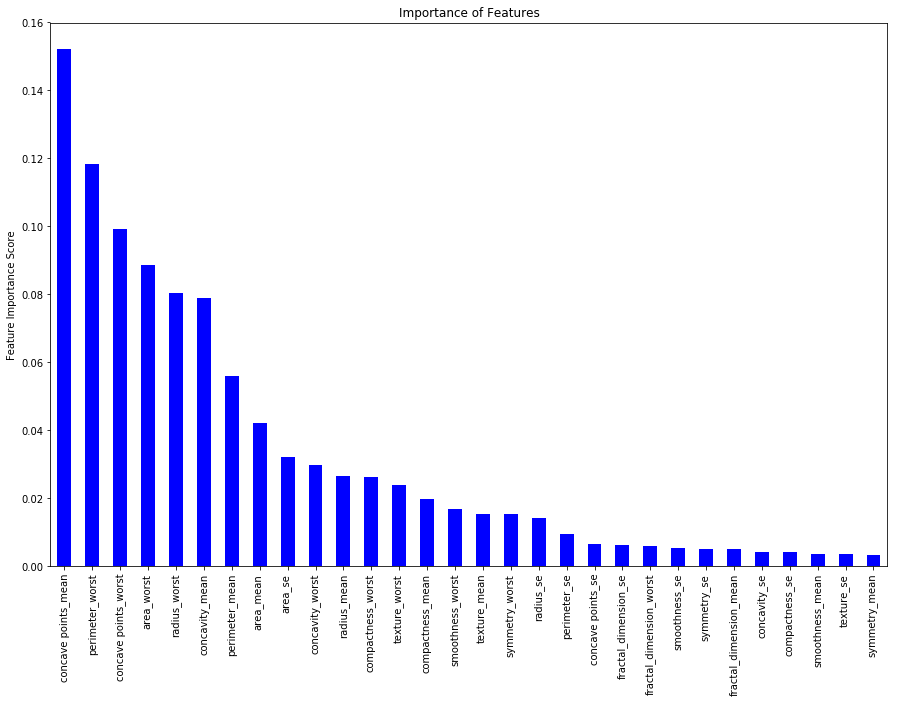

In [58]:
featimp = pd.Series(ranfor.feature_importances_, index=X.columns).sort_values(ascending=False)
# this is the property of Random Forest classifier that it provide us the importance of the features used
print(featimp[0:10]) 

plt.figure(figsize=(15,10))
featimp.plot(kind='bar', title='Importance of Features', color='blue') #color='blue'
plt.ylabel('Feature Importance Score')
plt.show()

## Gradient Boosting

In [59]:
# import gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: grad
grad = GradientBoostingClassifier()

# Fit the classifier to the training data
grad.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = grad.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', grad.score(X_train, y_train))
print('Accuracy on the test data = ', grad.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9517543859649122
[[144   4]
 [  7  73]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       148
          1       0.95      0.91      0.93        80

avg / total       0.95      0.95      0.95       228



In [60]:
# Import necessary modules
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = grad.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(grad, X, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9939189189189189
3-fold cross validation AUC scores:  [0.99053142 0.99573914 0.98631453]


## Tuning Parameters

Most data scientist see **number of trees**, **tree depth** and the **learning rate** as most crucial parameters.

We will start off with these three and then move to other tree-specific parameters and the subsamples. I will use 3-fold cross validation and evaluate models based on Recall. 

See this blog post [Machine Learning Mastery](https://machinelearningmastery.com/configure-gradient-boosting-algorithm/) for some guidance from academic papers.

In [61]:
# Look at parameters used by our gradient boosting classifier
print('Parameters currently in use:\n')
pprint(grad.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


In [62]:
parm_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

# create a base model
grad = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = grad, param_grid = parm_grid, scoring='recall',n_jobs=4,iid=False, cv=3)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 1750}

n_estimators changes to 1750 and learning_rate to 0.05...rerun the model

In [63]:
# re-run the model with the new n_estimators
grad = GradientBoostingClassifier(n_estimators=1750, learning_rate=0.05)

# Fit the classifier to the training data
grad.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = grad.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', grad.score(X_train, y_train))
print('Accuracy on the test data = ', grad.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9517543859649122
[[144   4]
 [  7  73]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       148
          1       0.95      0.91      0.93        80

avg / total       0.95      0.95      0.95       228



Tune Max_Depth

In [64]:
parm_grid = {'max_depth':[2,3,4,5,6,7]}

# create a base model with thenewly tunned parms
grad = GradientBoostingClassifier(n_estimators=1750, learning_rate=0.05)

grid_search = GridSearchCV(estimator = grad, param_grid = parm_grid, scoring='recall',n_jobs=4,iid=False, cv=3)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'max_depth': 4}

Max_depth changes to 4...rerun the model

In [65]:
# re-run the model with the new n_estimators
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750)

# Fit the classifier to the training data
grad.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = grad.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', grad.score(X_train, y_train))
print('Accuracy on the test data = ', grad.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9605263157894737
[[145   3]
 [  6  74]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       148
          1       0.96      0.93      0.94        80

avg / total       0.96      0.96      0.96       228



Slight increase in Accuracy, Malignant Recall is the same... Now lets examine the tree related parameters

### Min sample split and min samples leaf
**min_samples_split** sets the minimum number of samples to split while **min_samples_leaf** sets the minimum number of samples to form a leaf 

In [66]:
parm_grid = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

# create a base model with thenewly tunned parms
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750)

grid_search = GridSearchCV(estimator = grad, param_grid = parm_grid, scoring='recall',n_jobs=4,iid=False, cv=3)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 20}

In [67]:
# re-run the model with the new  min_samples_split
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750, min_samples_split=20, min_samples_leaf=5)

# Fit the classifier to the training data
grad.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = grad.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', grad.score(X_train, y_train))
print('Accuracy on the test data = ', grad.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9605263157894737
[[145   3]
 [  6  74]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       148
          1       0.96      0.93      0.94        80

avg / total       0.96      0.96      0.96       228



Slight decrease in test accuracy and Malignant Recall.

### Max features
The square root of features is usually a good starting point. Let's use CV to tune the parameter. 

In [68]:
parm_grid = {'max_features':[4,5,6,7,8,9]}

# create a base model with thenewly tunned parms
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750, min_samples_split=20, min_samples_leaf=5)

grid_search = GridSearchCV(estimator = grad, param_grid = parm_grid, scoring='recall',n_jobs=4,iid=False, cv=3)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'max_features': 4}

In [69]:
# re-run the model with the new max_features
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750, min_samples_split=20, 
                                  min_samples_leaf=5, max_features=4)

# Fit the classifier to the training data
grad.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = grad.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', grad.score(X_train, y_train))
print('Accuracy on the test data = ', grad.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9692982456140351
[[146   2]
 [  5  75]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       148
          1       0.97      0.94      0.96        80

avg / total       0.97      0.97      0.97       228



Slight increase in accuracy and Malignant Recall from the previous model

### Subsample
Subsample sets the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

In [70]:
parm_grid = {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

# create a base model with thenewly tunned parms
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750, min_samples_split=20, 
                                  min_samples_leaf=5, max_features=4)

grid_search = GridSearchCV(estimator = grad, param_grid = parm_grid, scoring='recall',n_jobs=4,iid=False, cv=3)

# fit the grid search to the data
grid_search.fit(X_train,y_train)

grid_search.best_params_

{'subsample': 0.7}

In [71]:
# re-run the model with the new subsample
grad = GradientBoostingClassifier(max_depth=4,learning_rate=0.05, n_estimators=1750, min_samples_split=20, 
                                  min_samples_leaf=5, max_features=4, subsample=0.7)

# Fit the classifier to the training data
grad.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = grad.predict(X_test)

# print training and test accuracies
print('Accuracy on the training data = ', grad.score(X_train, y_train))
print('Accuracy on the test data = ', grad.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on the training data =  1.0
Accuracy on the test data =  0.9780701754385965
[[147   1]
 [  4  76]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       148
          1       0.99      0.95      0.97        80

avg / total       0.98      0.98      0.98       228



In [72]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = grad.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(grad, X, y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print('3-fold cross validation AUC scores: ', cv_auc)

AUC: 0.9972128378378379
3-fold cross validation AUC scores:  [0.99349035 0.99680436 0.99159664]


Slight increase in accuracy and Malignant Recall from the previous GBC model

concave points_worst    0.013168
symmetry_worst          0.013088
concave points_mean     0.012143
texture_worst           0.011579
concavity_worst         0.011134
texture_mean            0.010392
area_worst              0.010049
radius_worst            0.009698
perimeter_mean          0.008518
perimeter_worst         0.008310
dtype: float64


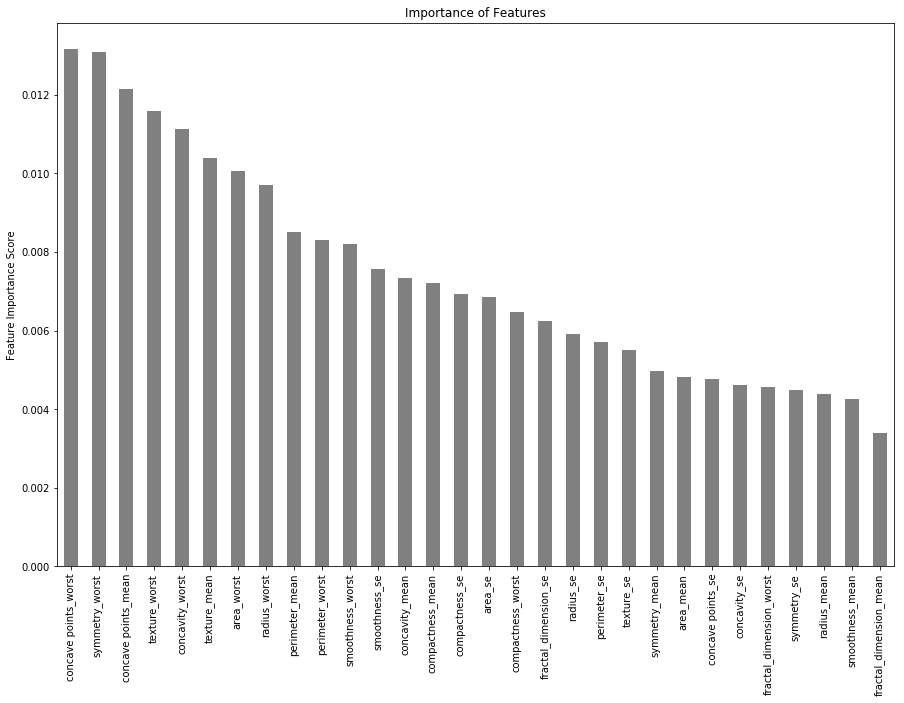

In [73]:
#graph feature importances

plt.figure(figsize=(15,10))
predictors=list(X_train)
feat_imp = pd.Series(grad.feature_importances_, predictors).sort_values(ascending=False)

print(feat_imp[0:10])

feat_imp.plot(kind='bar', title='Importance of Features', color='gray')
plt.ylabel('Feature Importance Score')
plt.show()